# Imports

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm
import sys

sys.path.append("../../src")
sys.path.append("../palm-tree")

import embedder
import models
import utils
import dataset

# Data

We should firstly parse the sample basic block data

In [16]:
data = []
basic_block = []

#Reading basic block data
with open("../../dataset/sample_basic_blocks.txt") as fIn:
    for line in tqdm.tqdm(fIn, desc='Read file'):
        #line start with "@" symbols the begging of a new basic block
        if line[0] == "@":
            data.append(basic_block)
            basic_block = []
        else:
            basic_block.append(line.rstrip())

#Removing first empty basic block
data = data[1:]

Read file: 52772it [00:00, 2198949.02it/s]


Unique basic blocks

In [35]:
bb_set = set(tuple(bb) for bb in data)
print(f"Number of basic blocks: {len(data)}")
print(f"Unique basic blocks: {len(bb_set)}")

Number of basic blocks: 11220
Unique basic blocks: 970


Since energy labels are not availiable yet we will consider a random float between 0 and 5 as an energy label for each basic block

In [26]:
labels = np.random.uniform(low=0.0, high=5.0, size=len(data))

In [28]:
data_df = pd.DataFrame({"basic_blocks": data, "energy_labels": labels})

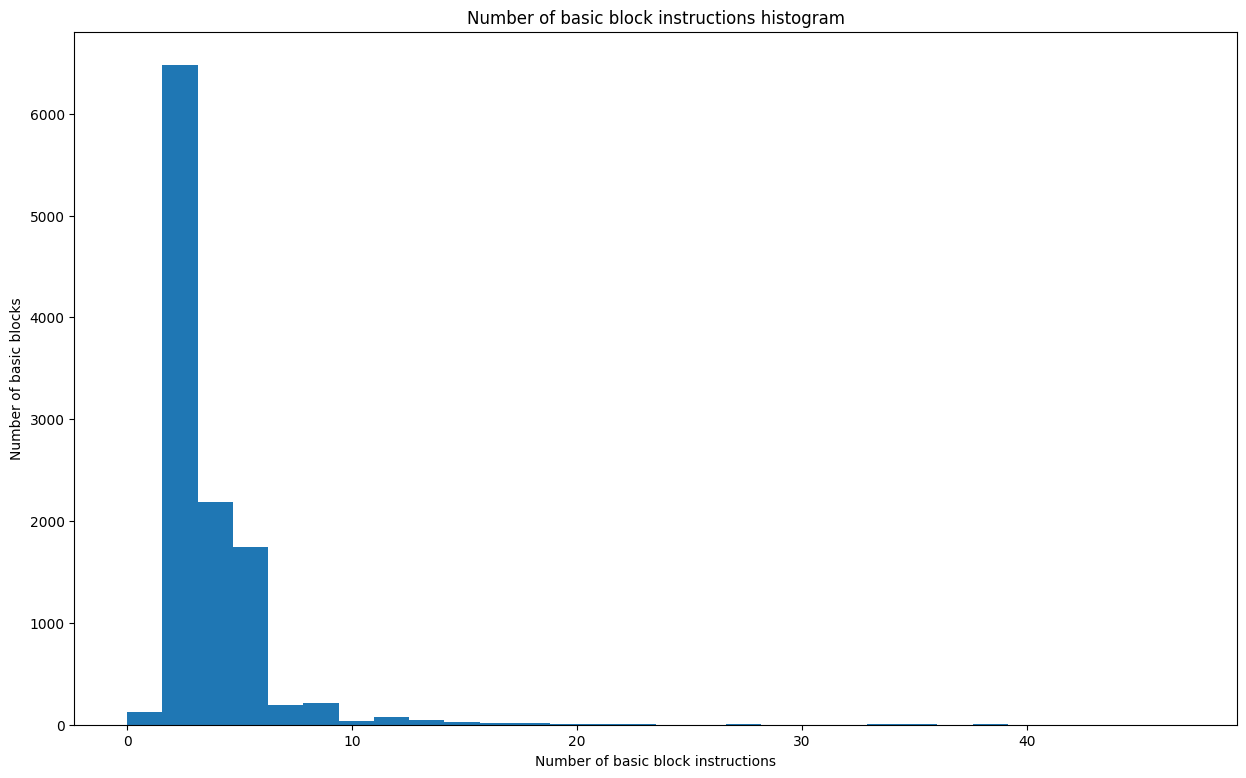

In [32]:
bb_instruction_num = data_df.basic_blocks.apply(lambda x: len(x)).values

plt.figure(figsize=(15,9))
plt.title("Number of basic block instructions histogram")
plt.xlabel("Number of basic block instructions")
plt.ylabel("Number of basic blocks")
plt.hist(bb_instruction_num, bins = 30)
plt.show()